# 결측치와 누락값 & 이상치

1. 결측치와 누락값, 그리고 이상치

:결측치와 누락값이 공통적으로 이야기하는 것은 값이 없다는 것 (NA, NaN 데이터에 보이는 것)

:누락값은 휴먼 에러로 인한 누락값, 따라서 어떤 이유로 누락이 되었는지 확인이 힐요

:결측지는 실제 Na값이지만 정말 Na 값인지 확인이 필요, 따라서 결측치가 순수하게 결측치의 의미인가 아니면 na값 자체가 값일 수 있는 것

 

:결측치 처리하는 방법 

① 가장 간단한 것은 버리고 날리는 것 -> 결측치를 날리는 기준은? 결측치가 전체 비중의 1%가 안 되면 쉽게 날리나, 절대값에 따라 달라질 수 있다.

② 결측치가 상당한 비중을 차지하는 경우? -> 이걸 다 날리게 된다면 머신에게 학습할 데이터 양이 줄어드는 것이므로 성능에 영향을 미칠 수 있게 되는 것이므로 결측치를 최대한 채워서 메꾸는 형식을 생각한다.

③ 너무 데이터가 다 결측치이면 그것은 날려도 상관이 없음 -> 80~90% 다 결측치 칼럼이면 비즈니스적인 이해관계를 보고 도메인 지식을 이용해 날려야 한다.

 

:결론적으로 결측치는 단순히 생각할 것이 아님 / 도메인과 통계적인 다방면적인 고민으로 해결해야 할 문제

 

:결측치를 나타내는 용어 

-완전 무작위 결측치 : MCAR (Missing Completely at Random)  어떤 인간의 편향이나 기계의 결함이 아니라 완전 무작위 랜덤한 결측치

- 무작위 결측 MAR(Missing at Random) : 어떤 상황으로 인해서 발생하는 경우

- 비무작위 결측 NMAR(Missing at Not Random) : 결측값인데 정말 na가 하나의 특성이 될 
실행결과: 아래의 매트릭스가 출력되는데 흰색으로 표현된 빈칸들이 결측치이다. 

### 결측치 처리 방법
① isna() 함수 : isna 메서드는 DataFrame내의 결측값을 확인해서 bool형식으로 반환하는 메서드, isna의 경우 결측값이면 True 반환, 정상값이면 False반환

②missingno 패키지 : 결측 데이터들을 파악하는데 직관적인 도움을 주는 패키지로, 이 중 matrix() 메서드는 변수로 전달한 데이터셋에 대한 결측치를 매트릭스로 시각화해 주는 역할을 한다. 

: msno.matrix(df=df_train.iloc[:, :], color=(0.1, 0.6, 0.8)) 
의 예제 코드에서는 df_train으로 지정한 데이터셋에 대하여 color 파라미터를 지정하여 RGB를 지정해주는 것까지 수행이 가능하다.

msno.matrix(df)
plt.show()
실행결과: 아래의 매트릭스가 출력되는데 흰색으로 표현된 빈칸들이 결측치이다. 

In [ ]:
pip install missingno

In [6]:
## 데이터 불러와서 결측치 보기

import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [8]:
df = pd.read_csv('C:\\Users\\jordi\\OneDrive\\바탕 화면\\DataAnalysis\\bike_sharing_daily.csv')
dfe = pd.read_csv('C:\\Users\\jordi\\OneDrive\\바탕 화면\\DataAnalysis\\country_timeseries.csv')

In [9]:
dfe.isna().sum() #na값 몇 개인가?

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

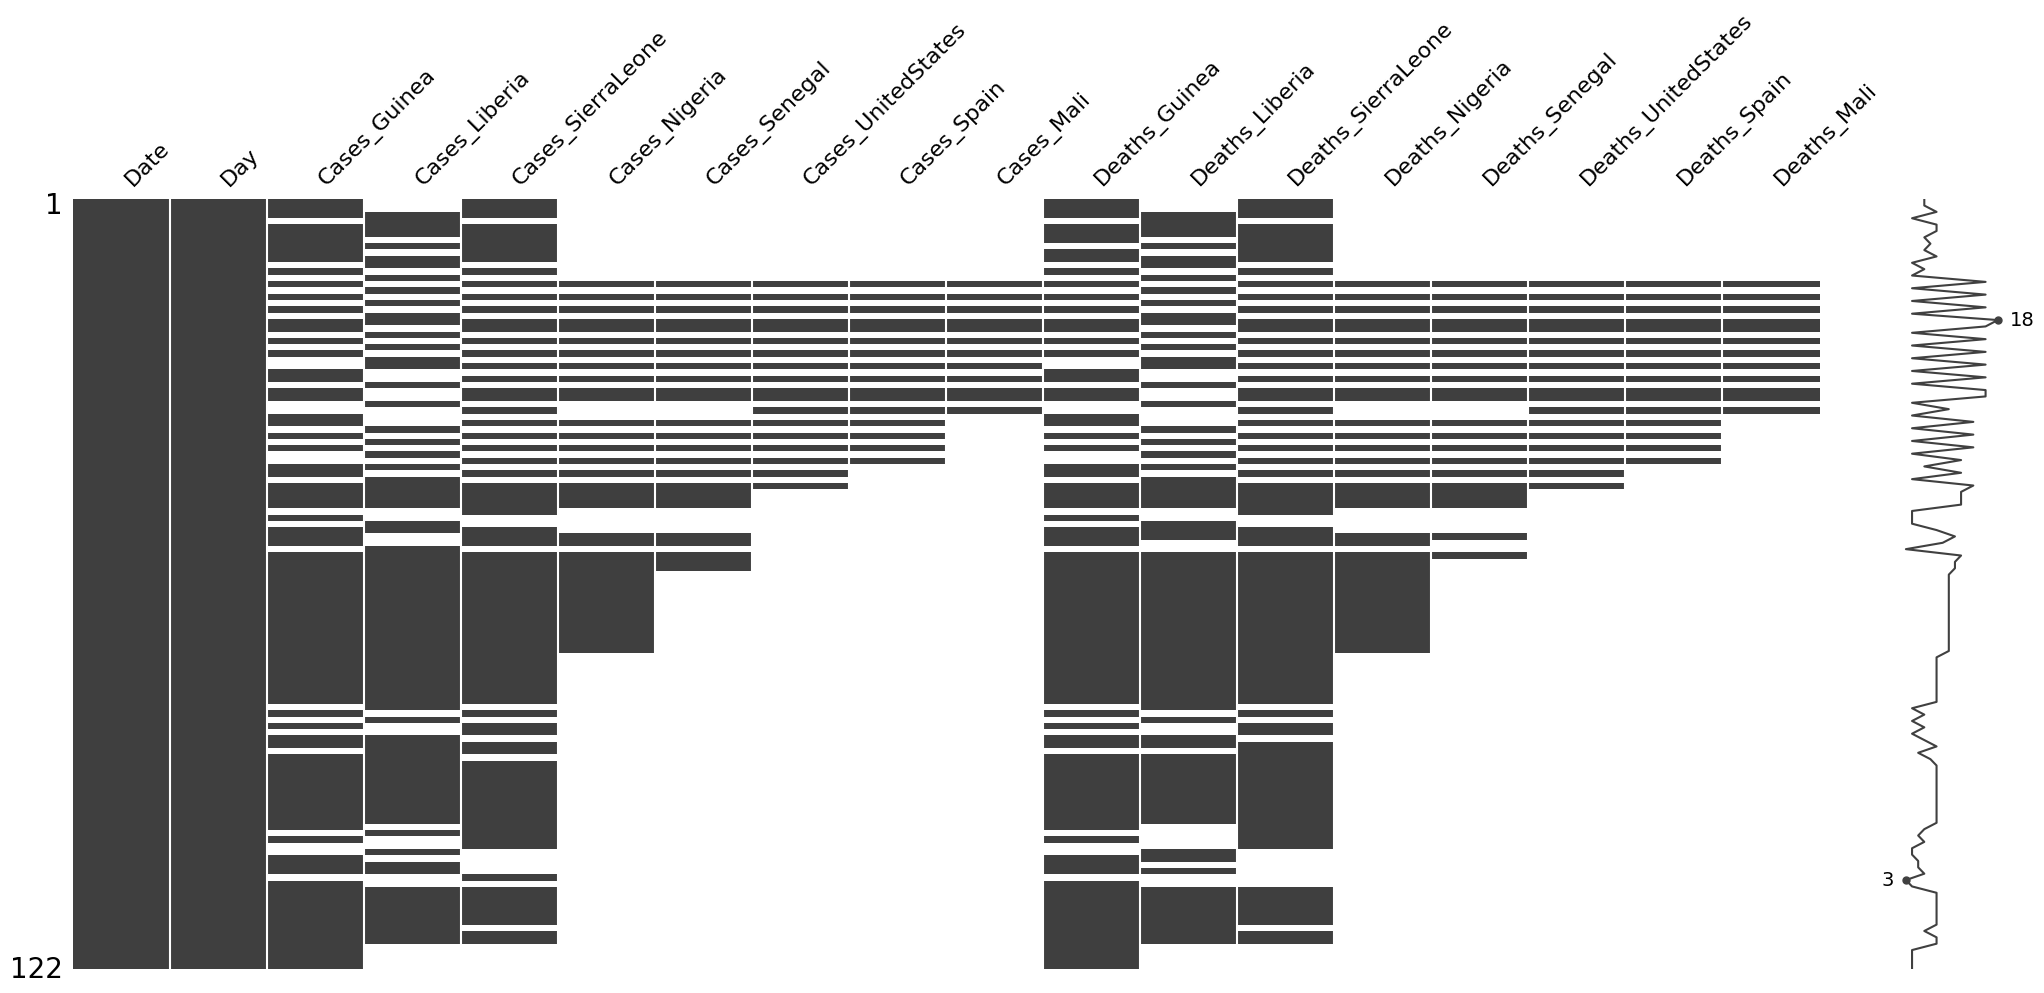

In [10]:
#결측치 시각화
msno.matrix(dfe)
plt.show()

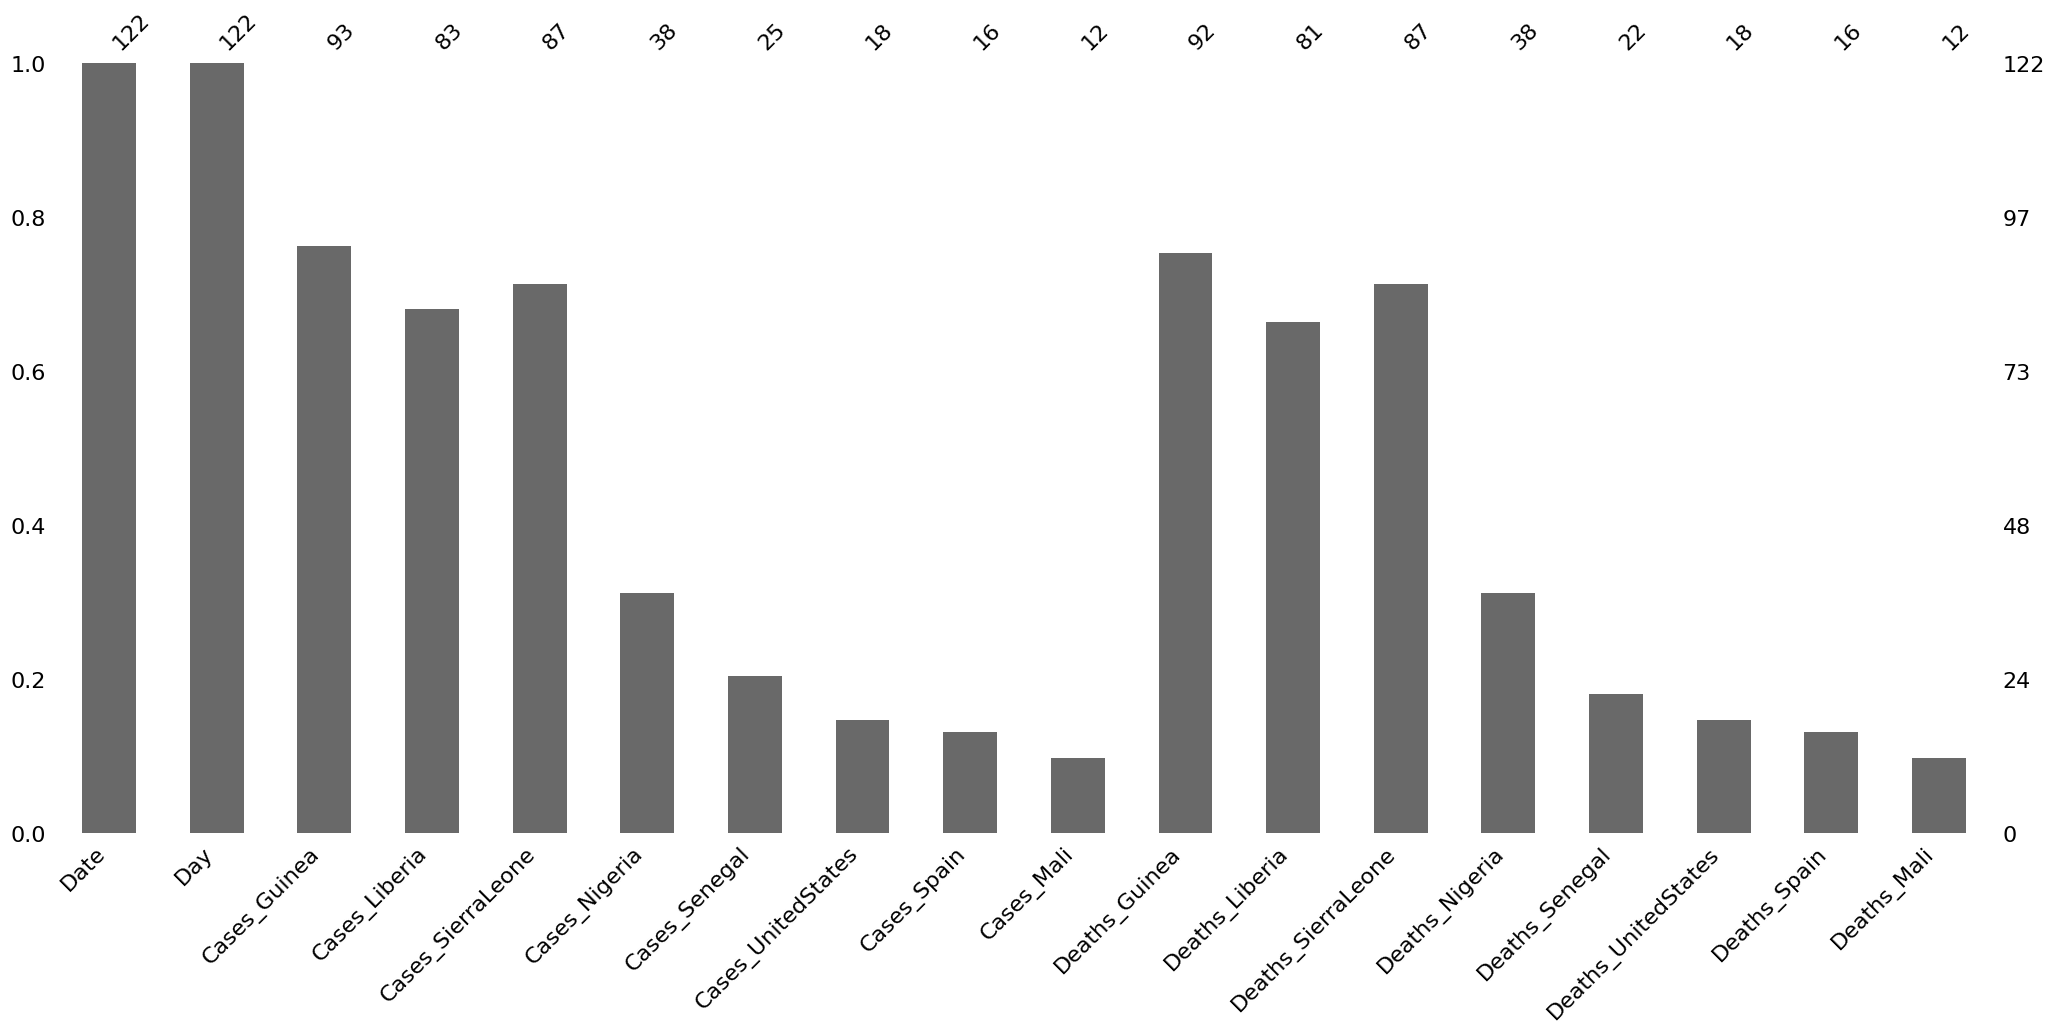

In [11]:
#막대그래프
# missingno 패키지에서 matrix() 메소드 말고도  bar() 메소드를 이용할 수 있는데, 동일하게 매개변수로 데이터셋을 전달하면 바 형태의 차트로 시각화를 해 준다. 
#전체값에서 결측치를 제외한 실질적인 값을 바 그래프의 형태로 나타내어주며, 위의 빈 공간만큼 결측치가 있다는 것을 시각화를 통해 확인이 가능하다.

msno.bar(dfe)
plt.show()

In [10]:
dfe

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone   
0      1/5/2015  289        2776.0            NaN            10030.0  \
1      1/4/2015  288        2775.0            NaN             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286           NaN         8157.0                NaN   
4    12/31/2014  284        2730.0         8115.0             9633.0   
..          ...  ...           ...            ...                ...   
117   3/27/2014    5         103.0            8.0                6.0   
118   3/26/2014    4          86.0            NaN                NaN   
119   3/25/2014    3          86.0            NaN                NaN   
120   3/24/2014    2          86.0            NaN                NaN   
121   3/22/2014    0          49.0            NaN                NaN   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain   
0              NaN            NaN                 NaN          NaN  \
1              NaN            NaN                 NaN          NaN   
2              NaN            NaN                 NaN          NaN   
3              NaN            NaN                 NaN          NaN   
4              NaN            NaN                 NaN          NaN   
..             ...            ...                 ...          ...   
117            NaN            NaN                 NaN          NaN   
118            NaN            NaN                 NaN          NaN   
119            NaN            NaN                 NaN          NaN   
120            NaN            NaN                 NaN          NaN   
121            NaN            NaN                 NaN          NaN   

     Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone   
0           NaN         1786.0             NaN              2977.0  \
1           NaN         1781.0             NaN              2943.0   
2           NaN         1767.0          3496.0              2915.0   
3           NaN            NaN          3496.0                 NaN   
4           NaN         1739.0          3471.0              2827.0   
..          ...            ...             ...                 ...   
117         NaN           66.0             6.0                 5.0   
118         NaN           62.0             NaN                 NaN   
119         NaN           60.0             NaN                 NaN   
120         NaN           59.0             NaN                 NaN   
121         NaN           29.0             NaN                 NaN   

     Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain   
0               NaN             NaN                  NaN           NaN  \
1               NaN             NaN                  NaN           NaN   
2               NaN             NaN                  NaN           NaN   
3               NaN             NaN                  NaN           NaN   
4               NaN             NaN                  NaN           NaN   
..              ...             ...                  ...           ...   
117             NaN             NaN                  NaN           NaN   
118             NaN             NaN                  NaN           NaN   
119             NaN             NaN                  NaN           NaN   
120             NaN             NaN                  NaN           NaN   
121             NaN             NaN                  NaN           NaN   

     Deaths_Mali  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
117          NaN  
118          NaN  
119          NaN  
120          NaN  
121          NaN  

[122 rows x 18 columns]

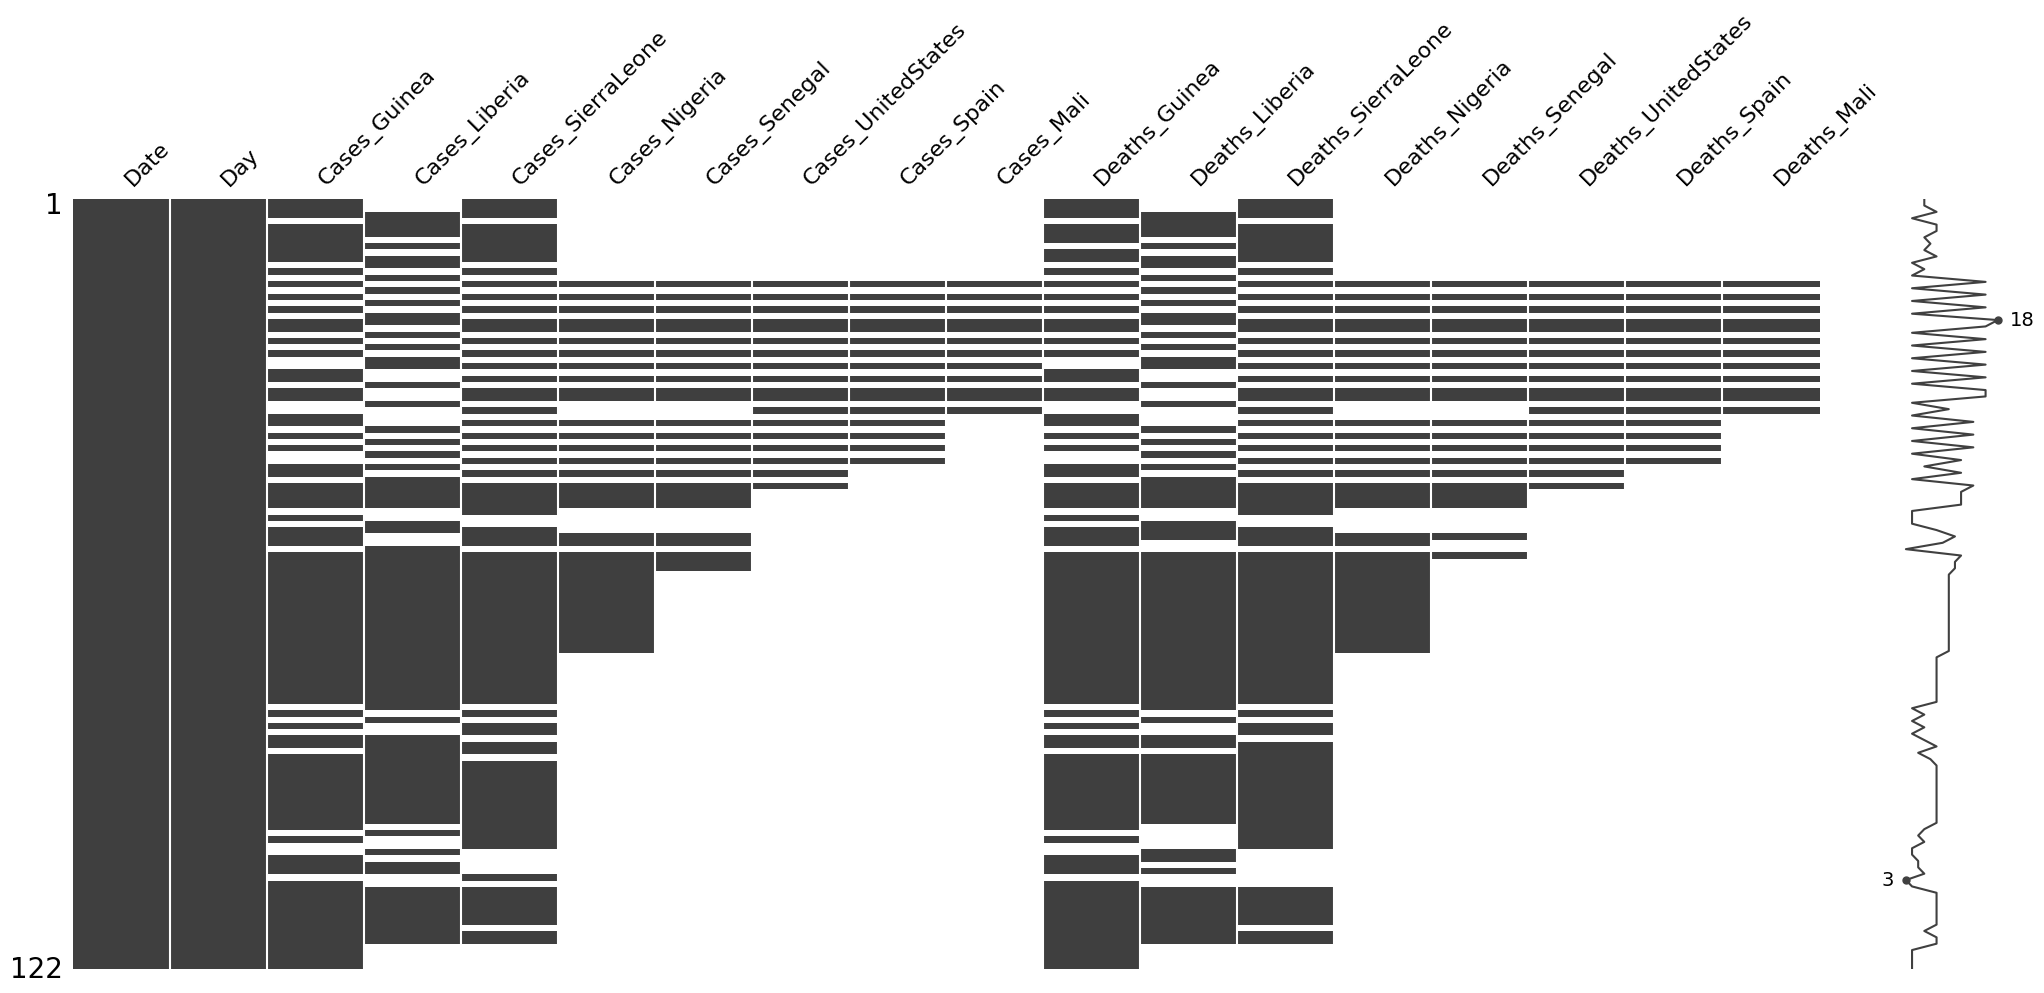

In [11]:
#결측치 시각화
msno.matrix(dfe)
plt.show()

## 결측치 처리법
-결측치 날리기, 제외하고 진행하기, 평균/중위값 등의 어떤 특정 통계 값으로 대체하는 것, 보간법(interpolation)...

-수업에는 보간법에 집중 (선형보간법, spline 보간법, 시계열보간법)

 

** loc() 과 iloc()

-loc() : 데이터 프레임의 행이나 컬럼에 label이나 boolean array로 접근하는 것, location의 약자로 인간이 읽을 수 있는 label값으로 데이터에 접근하는 것이다.

-iloc() : 데이터 프레임의 행이나 컬럼에 인덱스 값으로 접근하는 것, integer location의 약자로 컴퓨터가 읽을 수 있는 indexing 값으로 데이터에 접근하는 것이다.

 

** to_frame() : 통계값인 데이터 시리즈를 데이터프레임으로 바꿔주는 함수, 딱히 설정할 파라미터는 없고 데이터 시리즈가 담긴 변수 뒤에 도트 연산자를 사용하여 붙여주고 실행하기만 하면 된다

:다만, 이미 데이터 프레임인 정보가 담긴 변수 뒤에 to_frame()을 실행하면 오류가 발생한다.

 

 

-dropna() 메서드 : 결측치를 날리는 방법

In [12]:
dfe

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone   
0      1/5/2015  289        2776.0            NaN            10030.0  \
1      1/4/2015  288        2775.0            NaN             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286           NaN         8157.0                NaN   
4    12/31/2014  284        2730.0         8115.0             9633.0   
..          ...  ...           ...            ...                ...   
117   3/27/2014    5         103.0            8.0                6.0   
118   3/26/2014    4          86.0            NaN                NaN   
119   3/25/2014    3          86.0            NaN                NaN   
120   3/24/2014    2          86.0            NaN                NaN   
121   3/22/2014    0          49.0            NaN                NaN   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain   
0              NaN            NaN                 NaN          NaN  \
1              NaN            NaN                 NaN          NaN   
2              NaN            NaN                 NaN          NaN   
3              NaN            NaN                 NaN          NaN   
4              NaN            NaN                 NaN          NaN   
..             ...            ...                 ...          ...   
117            NaN            NaN                 NaN          NaN   
118            NaN            NaN                 NaN          NaN   
119            NaN            NaN                 NaN          NaN   
120            NaN            NaN                 NaN          NaN   
121            NaN            NaN                 NaN          NaN   

     Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone   
0           NaN         1786.0             NaN              2977.0  \
1           NaN         1781.0             NaN              2943.0   
2           NaN         1767.0          3496.0              2915.0   
3           NaN            NaN          3496.0                 NaN   
4           NaN         1739.0          3471.0              2827.0   
..          ...            ...             ...                 ...   
117         NaN           66.0             6.0                 5.0   
118         NaN           62.0             NaN                 NaN   
119         NaN           60.0             NaN                 NaN   
120         NaN           59.0             NaN                 NaN   
121         NaN           29.0             NaN                 NaN   

     Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain   
0               NaN             NaN                  NaN           NaN  \
1               NaN             NaN                  NaN           NaN   
2               NaN             NaN                  NaN           NaN   
3               NaN             NaN                  NaN           NaN   
4               NaN             NaN                  NaN           NaN   
..              ...             ...                  ...           ...   
117             NaN             NaN                  NaN           NaN   
118             NaN             NaN                  NaN           NaN   
119             NaN             NaN                  NaN           NaN   
120             NaN             NaN                  NaN           NaN   
121             NaN             NaN                  NaN           NaN   

     Deaths_Mali  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
117          NaN  
118          NaN  
119          NaN  
120          NaN  
121          NaN  

[122 rows x 18 columns]

In [13]:
#결측치가 어떤 식으로 바뀌는지 확인하자! 
ebola=dfe.iloc[0:15,0:5]

- 결측치를 날리면?

In [14]:
ebola.dropna() # 데이터가 깔끔하게 정리는 된다.

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
2    1/3/2015  287        2769.0         8166.0             9722.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
7  12/24/2014  277        2630.0         7977.0             9203.0
9  12/20/2014  272        2571.0         7862.0             8939.0

- fillna(method = '') 문법

In [15]:
ebola['Cases_Guinea'].mean()

2632.4545454545455

In [16]:
# case Guinea 평균은 2632.4545454545455
ebola['Cases_Guinea'].fillna(2632.4545454545455).to_frame()

Cases_Guinea
0    2776.000000
1    2775.000000
2    2769.000000
3    2632.454545
4    2730.000000
5    2706.000000
6    2695.000000
7    2630.000000
8    2597.000000
9    2571.000000
10   2632.454545
11   2416.000000
12   2632.454545
13   2292.000000
14   2632.454545

In [17]:
# case Guinea 0으로 대체하게 된다면?
ebola['Cases_Guinea'].fillna(0).to_frame()
# 원본데이터 저장은 안 된다.

Cases_Guinea
0         2776.0
1         2775.0
2         2769.0
3            0.0
4         2730.0
5         2706.0
6         2695.0
7         2630.0
8         2597.0
9         2571.0
10           0.0
11        2416.0
12           0.0
13        2292.0
14           0.0

fillna() 메소드의 매개변수로 직접 결측값을 대체할 수를 전달할 수도 있고, 결측치를 치환시킬 메소드를 전달하는 것도 가능하다, 그 메소드 중 두 가지가 바로  ffill 과 bfill 이다.

-ffill: 누락값이 나타나기 전의 값으로 누락값을 변경, 즉 method인수에 ffill을 입력할 경우 결측값이 바로 위값과 동일하게 설정

-bfill:누락값이 나타나나 이후의 첫번째 값으로 앞쪽의 누락값을 변경, 즉 method인수에 bfill을 입력할 경우 결측값이 바로 아래값과 동일하게 설정

In [18]:
ebola['Cases_Guinea'].fillna(method='ffill').to_frame()

C:\Users\jordi\AppData\Local\Temp\ipykernel_16724\1538991367.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola['Cases_Guinea'].fillna(method='ffill').to_frame()


Cases_Guinea
0         2776.0
1         2775.0
2         2769.0
3         2769.0
4         2730.0
5         2706.0
6         2695.0
7         2630.0
8         2597.0
9         2571.0
10        2571.0
11        2416.0
12        2416.0
13        2292.0
14        2292.0

In [19]:
ebola.Cases_Guinea.to_frame()

Cases_Guinea
0         2776.0
1         2775.0
2         2769.0
3            NaN
4         2730.0
5         2706.0
6         2695.0
7         2630.0
8         2597.0
9         2571.0
10           NaN
11        2416.0
12           NaN
13        2292.0
14           NaN

In [20]:
ebola['Cases_Guinea'].fillna(method='bfill').to_frame()

C:\Users\jordi\AppData\Local\Temp\ipykernel_16724\2995136690.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola['Cases_Guinea'].fillna(method='bfill').to_frame()


Cases_Guinea
0         2776.0
1         2775.0
2         2769.0
3         2730.0
4         2730.0
5         2706.0
6         2695.0
7         2630.0
8         2597.0
9         2571.0
10        2416.0
11        2416.0
12        2292.0
13        2292.0
14           NaN

3. 보간법
   
문법 : interpolate(method=' ')

-누락값 사이의 값을(누락값 바로 위와 바로 아래의 값 두 개) 평균으로 대체해서 만든다

In [35]:
ebola

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0     1/5/2015  289        2776.0            NaN            10030.0
1     1/4/2015  288        2775.0            NaN             9780.0
2     1/3/2015  287        2769.0         8166.0             9722.0
3     1/2/2015  286           NaN         8157.0                NaN
4   12/31/2014  284        2730.0         8115.0             9633.0
5   12/28/2014  281        2706.0         8018.0             9446.0
6   12/27/2014  280        2695.0            NaN             9409.0
7   12/24/2014  277        2630.0         7977.0             9203.0
8   12/21/2014  273        2597.0            NaN             9004.0
9   12/20/2014  272        2571.0         7862.0             8939.0
10  12/18/2014  271           NaN         7830.0                NaN
11  12/14/2014  267        2416.0            NaN             8356.0
12   12/9/2014  262           NaN         7797.0                NaN
13   12/7/2014  260        2292.0            NaN             7897.0
14   12/3/2014  256           NaN         7719.0                NaN

In [21]:
ebola['Cases_Guinea'].interpolate().to_frame()

Cases_Guinea
0         2776.0
1         2775.0
2         2769.0
3         2749.5
4         2730.0
5         2706.0
6         2695.0
7         2630.0
8         2597.0
9         2571.0
10        2493.5
11        2416.0
12        2354.0
13        2292.0
14        2292.0

In [22]:
ebola['Cases_Guinea'].fillna(method='bfill').to_frame()

C:\Users\jordi\AppData\Local\Temp\ipykernel_16724\2995136690.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola['Cases_Guinea'].fillna(method='bfill').to_frame()


Cases_Guinea
0         2776.0
1         2775.0
2         2769.0
3         2730.0
4         2730.0
5         2706.0
6         2695.0
7         2630.0
8         2597.0
9         2571.0
10        2416.0
11        2416.0
12        2292.0
13        2292.0
14           NaN

### 보간법에 대해서 

method must be one of 

['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

In [38]:
ebola['Cases_Guinea'].interpolate(method='dfas').to_frame()

ValueError: method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']. Got 'dfas' instead.

<Axes: >

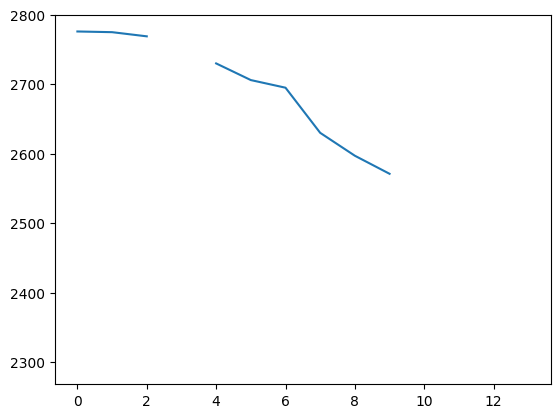

In [23]:
# 결측값이 있는 경우는 뚝 떨어진 값이 된다.
ebola['Cases_Guinea'].plot()

<Axes: >

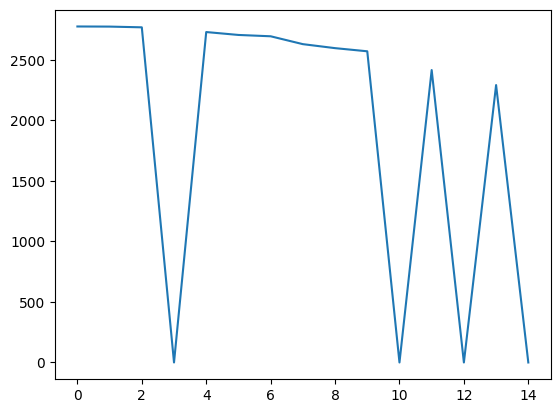

In [24]:
# 결측값이 있는 경우는 뚝 떨어진 값이 된다.
ebola['Cases_Guinea'].fillna(0).plot()

<Axes: >

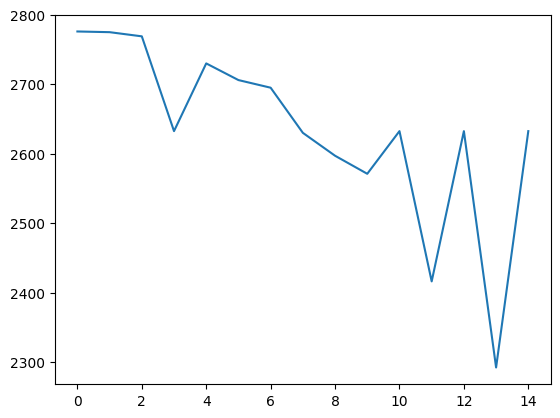

In [25]:
# 결측값이 있는 경우는 뚝 떨어진 값이 된다.
ebola['Cases_Guinea'].fillna(2632.4545454545455).plot()

<Axes: >

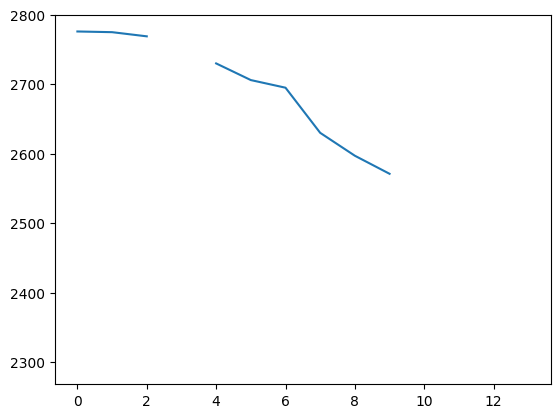

In [26]:
# 결측값이 있는 경우는 뚝 떨어진 값이 된다.
ebola['Cases_Guinea'].plot()

- 선형 보간법
- 두 점사의 거리 구하는 공식 
- 1차원 두 점사이의 거리로 해당 누락값을 대체한다. 

<Axes: >

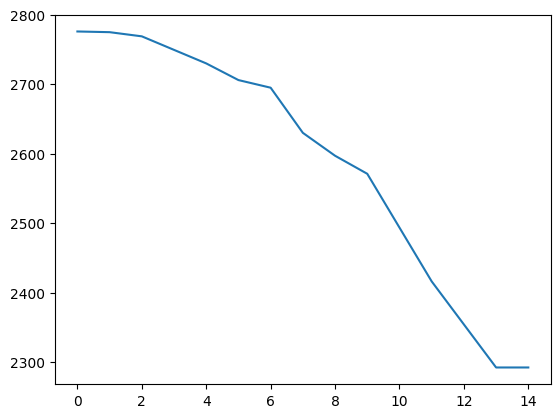

In [27]:
ebola['Cases_Guinea'].interpolate(method='linear').plot()

<Axes: >

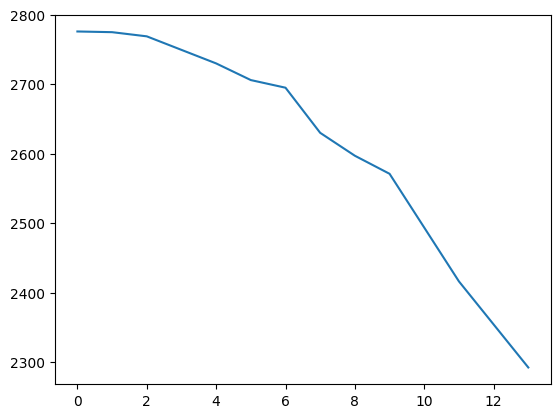

In [28]:
#1차 2차, 3차 항을 높이면서 보간
ebola['Cases_Guinea'].interpolate(method='slinear').plot()

<Axes: >

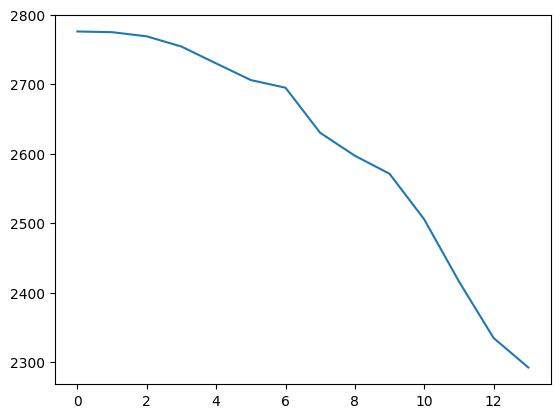

In [29]:
#1차 2차, 3차 항을 높이면서 보간
ebola['Cases_Guinea'].interpolate(method='cubic').plot()

<Axes: >

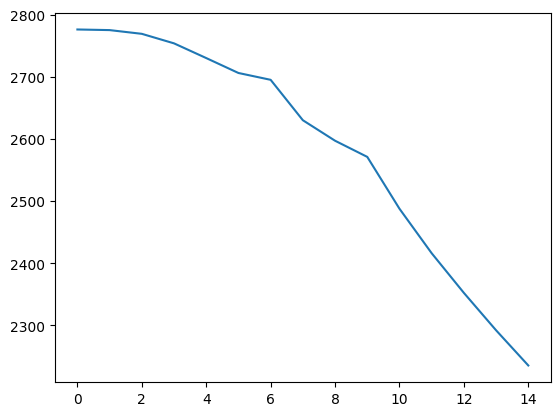

In [30]:
#spline
#기존에는 1차원 차원으로 생각해서 보간을 했다면
#spline 통해서 order 차수 높이면
# 2차원 이상으로 

ebola['Cases_Guinea'].interpolate(method='spline',order=2).plot()

In [34]:
dfe['Date']=pd.to_datetime(dfe['Date'])

df_e=dfe.set_index('Date')

In [35]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [37]:
df_e.iloc[0:15,0:5]['Cases_Guinea'].interpolate(method='time').to_frame() #시간에 따른 결측치 대체
# 시계열로 대체를 할 때는 양쪽의 값을 가지고 Na값을 대체하기 때문에 

Cases_Guinea
Date                    
2015-01-05   2776.000000
2015-01-04   2775.000000
2015-01-03   2769.000000
2015-01-02   2756.000000
2014-12-31   2730.000000
2014-12-28   2706.000000
2014-12-27   2695.000000
2014-12-24   2630.000000
2014-12-21   2597.000000
2014-12-20   2571.000000
2014-12-18   2519.333333
2014-12-14   2416.000000
2014-12-09   2327.428571
2014-12-07   2292.000000
2014-12-03   2292.000000

In [38]:
ebola['Cases_Guinea']

0     2776.0
1     2775.0
2     2769.0
3        NaN
4     2730.0
5     2706.0
6     2695.0
7     2630.0
8     2597.0
9     2571.0
10       NaN
11    2416.0
12       NaN
13    2292.0
14       NaN
Name: Cases_Guinea, dtype: float64

### 필수과제1
- bike 데이터를 가지고 위의 보간법을 진행해 주세요.
- 실제 bike 데이터를 가지고 보간법 후에 시각화를 통해서 어떤 식으로 변화하는지를 체크해 주세요!
- 수업시간 배운 것외에 2~3가지 정도만 추가로 진행해 보시면 좋을 것 같습니다. 보간법 사용 방법 